In [ ]:
!pip install pydub
!pip install librosa==0.8.0

In [ ]:
%matplotlib inline
import os
from glob import glob
import soundfile as sf
from pydub import AudioSegment

import librosa
import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [ ]:
def convertir_m4a_to_wav(direccion_archivo, 
                         formato='wav', 
                         destino="wavs"):
    
    carpeta = direccion_archivo.split("/")[0]
    file_extension = direccion_archivo.split(".")[-1]
    # print(file_extension)
    wav_filename = direccion_archivo.replace(file_extension, 'wav')
    print("filepath:", direccion_archivo)
    print("wav_filename:", wav_filename)
    if destino!=None:
        if "/" in direccion_archivo:
            wav_filename = wav_filename.replace(carpeta, destino)
            print("wav name", wav_filename)
        else:
            wav_filename = destino+"/"+wav_filename
            print("wav name", wav_filename)
    try:
        track = AudioSegment.from_file(direccion_archivo, file_extension)
        print('CONVERTING: ' + str(wav_filename))
        file_handle = track.export(wav_filename, format='wav')
        # wavs.write(wav_filename+'\n')
    except:
        print("ERROR CONVERTING " + str(wav_filename))
    print()

In [ ]:
os.listdir("wavs16")

['20210201_110932.wav',
 '20210201_122257.wav',
 '20210201_132952.wav',
 '20210201_143437.wav',
 '20210201_153506.wav']

In [ ]:
m4as = [i.split(".")[0] for i in os.listdir() if "m4a" in i]
16mm = [i+".m4a" for i in m4as if ]
#16mm = [i for i in os.listdir("wavs16")]
#for i in 16mm:
#    convertir_m4a_to_wav(i, destino='wavs16')

['20210201_110932',
 '20210201_122257',
 '20210201_132952',
 '20210201_143437',
 '20210201_153506']

In [ ]:
n = 4
selection = glob("wavs16/*")[n]
print("audio a dividir:", selection)

def getSize(filename):
    st = os.stat(filename)
    return int(st.st_size)

pesoMb = (getSize(selection)/1024)
print("Peso: {:.2f} GB".format(pesoMb/1e6))
print()
if pesoMb<5e5:
    print("AUDIO POR DEBAJO DEL PESO NORMAL\nNOTIFICAR AL JEAN PAUL")
else:
    print("PUEDE PROCEDER. TAMAÑO DEL AUDIO ARRIBA DE 0.5 GB: {:.2f} GB".format(pesoMb/1e6))

audio a dividir: wavs16/20210201_153506.wav
Peso: 0.40 GB

AUDIO POR DEBAJO DEL PESO NORMAL
NOTIFICAR AL JEAN PAUL


In [ ]:
audio, rate = librosa.load(selection, sr=None)
# filtro de audio que aumenta senales de alta frecuencia
steps = audio.shape[0] # tupla de un elemento: steps
limit = 288*1e5
# if steps > 
segundos = steps/rate
mins = segundos/60
print("steps del audio:", steps)
print("Longitud (segundos):", round(segundos, 1))
print("longitud (minutos):", round(segundos/60, 1))

steps del audio: 101822464
Longitud (segundos): 2121.3
longitud (minutos): 35.4


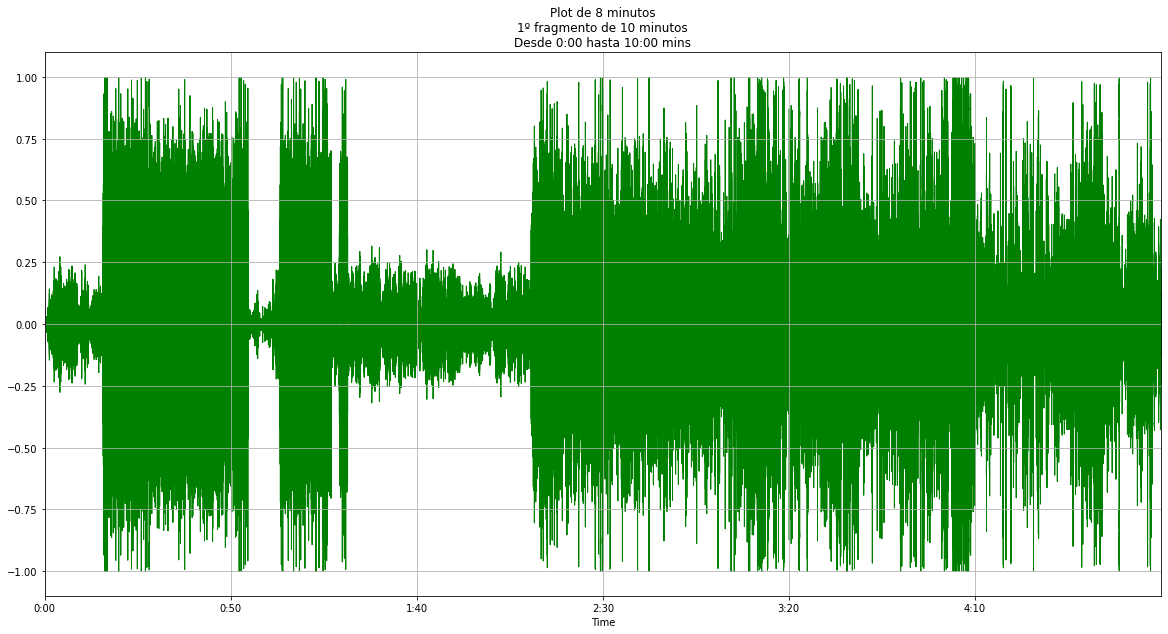

In [ ]:
def audio_por_seccion(audio_, minutos_seccion=3, seccion=1):
    Mins = int(2880000*minutos_seccion)
    init = seccion-1
    inicio = Mins*init
    fin = Mins*seccion

    audio_mins = audio_[inicio:fin]
    return audio_mins, minutos_seccion, seccion

ene = 10
mins10 = 1     ### <- Cambiar para graficar el primer, segundo o n fragmento de 8 minuntos
in_ = mins10-1
plt.figure(figsize=(20, 10))
plt.title("Plot de 8 minutos\n{}º fragmento de 10 minutos\nDesde {}:00 hasta {}:00 mins".format(mins10, in_*ene, mins10*ene))
librosa.display.waveplot(audio[rate*in_:rate*300*mins10], sr=rate, color='g')
plt.grid(True)
plt.show()

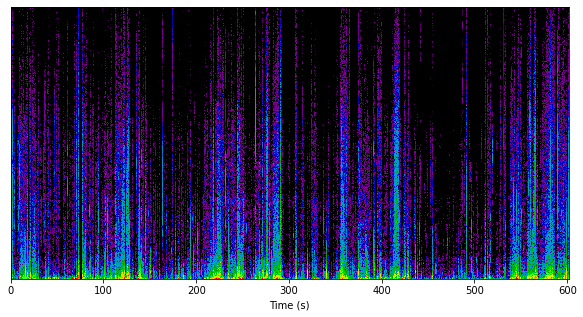

In [ ]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)))
librosa.display.specshow(spectrogram[:int(1025*.67), 94*600:94*1200],
                             sr=rate,
                             x_axis='s',
                             cmap=plt.get_cmap('nipy_spectral'))

In [ ]:
ipd.Audio(audio[rate*10:rate*20], rate=rate)

In [ ]:
def segundos_(secs):
    a, b = str(secs/60).split(".")
    b = str(float("."+b)*60).split(".")[0]
    return "{}:{}".format(a, b)
segundos_(597)

'9:57'

In [ ]:
def get_steps(start):
    print("Activacion de la alimentadora a las", start)
    part = start.split(":")
    mins = int(part[0])
    segundos = int(part[-1])
    segundos-= 10
    if segundos<0:
        segundos+=60
        mins-=1
    
    if mins<0:
        mins+=1
        segundos-=50

    print("Seleccion (10 segundos antes):  {}:{}".format(mins, segundos))
    mins*=60
    secs = mins + segundos
    print("Total segundos from the beginning:",  secs)

    steps_split = int((secs*28800000)/600)
    print("Total steps from the beginning:", steps_split)
    return steps_split

### Inicio/Activacion de la Alimentadora
start = "9:57"                                                                                                                      #CAMBIA EL MINUTO
steps_totales = get_steps(start)
print("\nSteps de partida:", steps_totales/rate, "segundos")

Activacion de la alimentadora a las 9:57
Seleccion (10 segundos antes):  9:47
Total segundos from the beginning: 587
Total steps from the beginning: 28176000

Steps de partida: 587.0 segundos


In [ ]:
print("Audio Actual:", selection)
indices = len(audio)
inds = np.array(range(steps_totales, indices+1, 28800000))
"Audios:", len(inds), inds

Audio Actual: wavs16/20210201_143437.wav


('Audios:', 5, array([ 28176000,  56976000,  85776000, 114576000, 143376000]))

In [ ]:
M = []                                                                                                                                #CUENTA LOS APLICA
for i in range(len(inds)-1):
    v1 = inds[i]
    v2 = inds[i+1]
    # print(v1, v2)
    N = np.array(audio[v1:v2])
    if N.max()>0.25 and N.std()>0.015:
    # if N.max()>0.25:
        print(N.max(), N.min(), N.mean(), N.std(), "APLICA")
        M.append(N)
        print()
    else:
        print(N.max(), N.min(), N.mean(), N.std(), "NO APLICA")
        print()
len(M), M

0.9999695 -1.0 -0.00016645125 0.052137803 APLICA

0.9999695 -1.0 -0.00016576059 0.058475047 APLICA

0.9999695 -1.0 -9.814446e-05 0.059743192 APLICA

0.9999695 -1.0 -0.000102640646 0.05587148 APLICA



(4, [array([-0.00419617,  0.00135803,  0.00444031, ...,  0.01086426,
          0.00946045,  0.00662231], dtype=float32),
  array([0.00762939, 0.00933838, 0.00836182, ..., 0.01931763, 0.01184082,
         0.00927734], dtype=float32),
  array([ 0.01257324,  0.02282715,  0.03118896, ..., -0.0038147 ,
         -0.00186157, -0.00186157], dtype=float32),
  array([-0.00177002,  0.00115967,  0.0032959 , ...,  0.00482178,
          0.00473022,  0.00430298], dtype=float32)])

In [ ]:
M = M[:]                                                                                                                #MODIFICA SEGÚN LOS QUE SIRVAN
carpDest = "16mm"
print("Audio a dividir:", selection)
name_format = carpDest+"/"+selection.split("/")[-1].split(".")[0]
print("Verify:", name_format)
split_names = ["{}_{}_{}.wav".format(name_format, i+1, len(M)) for i in range(len(M))]
print("Numero de audios a generar:", len(split_names))
print("Nombres de audios a generar:\n")
split_names

Audio a dividir: wavs16/20210201_143437.wav
Verify: 16mm/20210201_143437
Numero de audios a generar: 4
Nombres de audios a generar:



['16mm/20210201_143437_1_4.wav',
 '16mm/20210201_143437_2_4.wav',
 '16mm/20210201_143437_3_4.wav',
 '16mm/20210201_143437_4_4.wav']

In [ ]:
#### el indice puede cambiar
indice = -1
ipd.Audio(M[indice][:rate*15], rate=rate) # load a NumPy array 

In [ ]:
for i, arr in enumerate(M):
    output_name = split_names[i]
    sf.write(file=output_name,
             data=arr,
             samplerate=rate,
             subtype='PCM_32') # writing wave file in .wav format

# fili = open("wavs10.txt", "a+")
# fili.write(selection+"\n")
# fili.close()
print("AUDIOS GUARDADOS EXITOSAMENTE!")

AUDIOS GUARDADOS EXITOSAMENTE!
